<a href="https://colab.research.google.com/github/itzayush21/Deep_learning/blob/main/Skin_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d ismailpromus/skin-diseases-image-dataset

Dataset URL: https://www.kaggle.com/datasets/ismailpromus/skin-diseases-image-dataset
License(s): copyright-authors
100% 5.18G/5.19G [03:58<00:00, 23.7MB/s]
100% 5.19G/5.19G [03:58<00:00, 23.4MB/s]


In [ ]:
import zipfile
import zipfile
zip_ref = zipfile.ZipFile('/content/skin-diseases-image-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import os

# Path to your IMG_CLASSES folder
data_dir = "/content/IMG_CLASSES"

# Map leading digits to disease names
folder_mapping = {
    "1.": "Eczema",
    "2.": "Melanoma",
    "3.": "Atopic Dermatitis",
    "4.": "Basal Cell Carcinoma",
    "5.": "Melanocytic Nevi",
    "6.": "Benign Keratosis-like Lesions",
    "7.": "Psoriasis and Related Diseases",
    "8.": "Seborrheic Keratoses and Benign Tumors",
    "9.": "Tinea and Fungal Infections",
    "10.": "Warts and Viral Infections"
}

# Rename folders
for folder_name in os.listdir(data_dir):
    # Extract leading digit(s) from the folder name
    leading_digit = folder_name.split(" ")[0]
    if leading_digit in folder_mapping:
        # New name based on mapping
        new_name = folder_mapping[leading_digit]
        old_path = os.path.join(data_dir, folder_name)
        new_path = os.path.join(data_dir, new_name)

        # Rename the folder
        os.rename(old_path, new_path)
        print(f"Renamed: {old_path} -> {new_path}")
    else:
        print(f"Skipped: {folder_name} (No mapping found)")


Renamed: /content/IMG_CLASSES/6. Benign Keratosis-like Lesions (BKL) 2624 -> /content/IMG_CLASSES/Benign Keratosis-like Lesions
Renamed: /content/IMG_CLASSES/2. Melanoma 15.75k -> /content/IMG_CLASSES/Melanoma
Renamed: /content/IMG_CLASSES/5. Melanocytic Nevi (NV) - 7970 -> /content/IMG_CLASSES/Melanocytic Nevi
Renamed: /content/IMG_CLASSES/3. Atopic Dermatitis - 1.25k -> /content/IMG_CLASSES/Atopic Dermatitis
Renamed: /content/IMG_CLASSES/9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k -> /content/IMG_CLASSES/Tinea and Fungal Infections
Renamed: /content/IMG_CLASSES/8. Seborrheic Keratoses and other Benign Tumors - 1.8k -> /content/IMG_CLASSES/Seborrheic Keratoses and Benign Tumors
Renamed: /content/IMG_CLASSES/10. Warts Molluscum and other Viral Infections - 2103 -> /content/IMG_CLASSES/Warts and Viral Infections
Renamed: /content/IMG_CLASSES/4. Basal Cell Carcinoma (BCC) 3323 -> /content/IMG_CLASSES/Basal Cell Carcinoma
Renamed: /content/IMG_CLASSES/1. Eczema 1677 -

In [ ]:
import os
data_dir = "/content/IMG_CLASSES"

class_names = os.listdir(data_dir)

image_counts = {}

for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        image_counts[class_name] = len(os.listdir(class_path))

print("Image Counts:")
for class_name, count in image_counts.items():
    print(f"{class_name}: {count} images")


Image Counts:
Seborrheic Keratoses and Benign Tumors: 1847 images
Benign Keratosis-like Lesions: 2079 images
Basal Cell Carcinoma: 3323 images
Psoriasis and Related Diseases: 2055 images
Melanoma: 3140 images
Warts and Viral Infections: 2103 images
Atopic Dermatitis: 1257 images
Tinea and Fungal Infections: 1702 images
Eczema: 1677 images
Melanocytic Nevi: 7970 images


In [ ]:
import os
import random
import shutil

data_dir = "/content/IMG_CLASSES"
target_count = 2000
balanced_dir = "/content/IMG_CLASSES_BALANCED"
os.makedirs(balanced_dir, exist_ok=True)

class_names = os.listdir(data_dir)

for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)
    balanced_class_path = os.path.join(balanced_dir, class_name)
    os.makedirs(balanced_class_path, exist_ok=True)

    images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

    if len(images) > target_count:
        selected_images = random.sample(images, target_count)
    elif len(images) < target_count:
        selected_images = images.copy()
        while len(selected_images) < target_count:
            selected_images.append(random.choice(images))
    else:
        selected_images = images

    for img_name in selected_images:
        src = os.path.join(class_path, img_name)
        dst = os.path.join(balanced_class_path, img_name)
        shutil.copy(src, dst)

    print(f"Processed {class_name}: {len(selected_images)} images")

print("Balancing complete. Check:", balanced_dir)


Processed Seborrheic Keratoses and Benign Tumors: 2000 images
Processed Benign Keratosis-like Lesions: 2000 images
Processed Basal Cell Carcinoma: 2000 images
Processed Psoriasis and Related Diseases: 2000 images
Processed Melanoma: 2000 images
Processed Warts and Viral Infections: 2000 images
Processed Atopic Dermatitis: 2000 images
Processed Tinea and Fungal Infections: 2000 images
Processed Eczema: 2000 images
Processed Melanocytic Nevi: 2000 images
Balancing complete. Check: /content/IMG_CLASSES_BALANCED


In [ ]:
import tensorflow as tf

data_dir = "/content/IMG_CLASSES_BALANCED"

batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


class_names = train_ds.class_names
print("Classes found:", class_names)


    # Optimize validation data

print("Datasets prepared! Training and validation datasets are ready.")


Found 18483 files belonging to 10 classes.
Using 14787 files for training.
Found 18483 files belonging to 10 classes.
Using 3696 files for validation.
Classes found: ['Atopic Dermatitis', 'Basal Cell Carcinoma', 'Benign Keratosis-like Lesions', 'Eczema', 'Melanocytic Nevi', 'Melanoma', 'Psoriasis and Related Diseases', 'Seborrheic Keratoses and Benign Tumors', 'Tinea and Fungal Infections', 'Warts and Viral Infections']
Datasets prepared! Training and validation datasets are ready.


In [ ]:
dict={}
for i,j in enumerate(class_names):
  dict[i]=j
print(dict)

{0: 'Atopic Dermatitis', 1: 'Basal Cell Carcinoma', 2: 'Benign Keratosis-like Lesions', 3: 'Eczema', 4: 'Melanocytic Nevi', 5: 'Melanoma', 6: 'Psoriasis and Related Diseases', 7: 'Seborrheic Keratoses and Benign Tumors', 8: 'Tinea and Fungal Infections', 9: 'Warts and Viral Infections'}


In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras import Sequential

In [ ]:
def process(image,label):
  image=tf.cast(image/255.0,tf.float32)
  return image,label

train_ds=train_ds.map(process)
val_ds=val_ds.map(process)

In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,178,762 (42.64 MB)

 Trainable params: 11,178,314 (42.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 99s 188ms/step - accuracy: 0.2061 - loss: 7.3569 - val_accuracy: 0.2113 - val_loss: 2.0731
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 82s 178ms/step - accuracy: 0.2277 - loss: 2.1467 - val_accuracy: 0.2887 - val_loss: 1.8640
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 130s 151ms/step - accuracy: 0.2659 - loss: 1.9118 - val_accuracy: 0.2846 - val_loss: 1.7365
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 82s 151ms/step - accuracy: 0.3167 - loss: 1.6947 - val_accuracy: 0.3011 - val_loss: 1.6682
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 71s 154ms/step - accuracy: 0.3441 - loss: 1.6355 - val_accuracy: 0.4029 - val_loss: 1.4743
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 81s 151ms/step - accuracy: 0.3780 - loss: 1.5436 - val_accuracy: 0.3734 - val_loss: 1.5132
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 90s 167ms/step - accuracy: 0.3924 - loss: 1.5004 - val_accuracy: 0.3872 - val_loss: 1.6408
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 82s 168ms/step - accuracy: 0.4081 - loss: 

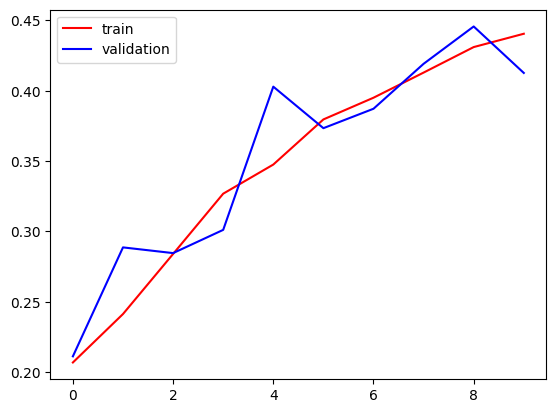

In [ ]:

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

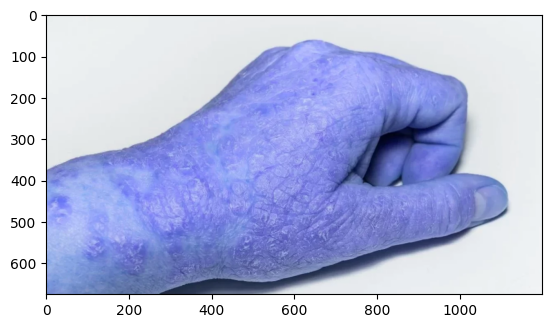

In [ ]:
import cv2
test_img=cv2.imread('/content/Atopic-Dermatitis.webp')
plt.imshow(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Melanoma


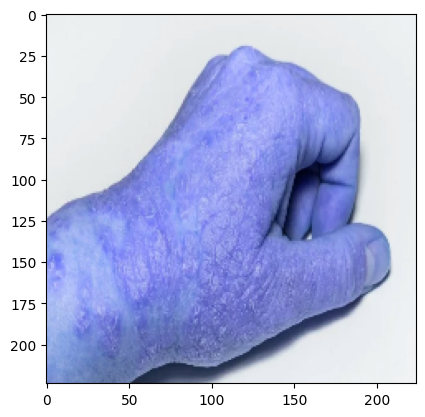

In [ ]:
import numpy as np
test_img=cv2.resize(test_img,(224,224))


test_input=test_img.reshape((1,224,224,3))
plt.imshow(test_img)

y=model.predict(test_input)
answer=dict[np.argmax(y)]
print(answer)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to your dataset
data_dir = "/content/IMG_CLASSES_BALANCED"

batch_size = 32
img_height, img_width = 224, 224
num_classes = 10

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2
)

train_ds = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training',
    seed=123,
    class_mode='sparse'
)

val_ds = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation',
    seed=123,
    class_mode='sparse'
)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

base_model.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(num_classes, activation='softmax')(x)  # Output layer for 10 classes

model2 = Model(inputs=base_model.input, outputs=output)

model2.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model2.summary()



Found 14788 images belonging to 10 classes.
Found 3695 images belonging to 10 classes.


Model: "functional_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:

epochs = 10
history = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Save the trained model
#model.save("skin_disease_model_pretrained.h5")

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


463/463 ━━━━━━━━━━━━━━━━━━━━ 124s 241ms/step - accuracy: 0.4389 - loss: 1.4392 - val_accuracy: 0.3800 - val_loss: 1.7671
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 125s 215ms/step - accuracy: 0.5915 - loss: 1.0292 - val_accuracy: 0.4360 - val_loss: 1.8206
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 145s 222ms/step - accuracy: 0.6405 - loss: 0.9182 - val_accuracy: 0.4189 - val_loss: 1.8416
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 100s 213ms/step - accuracy: 0.6768 - loss: 0.8336 - val_accuracy: 0.4457 - val_loss: 1.8886
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 142s 213ms/step - accuracy: 0.7079 - loss: 0.7607 - val_accuracy: 0.4804 - val_loss: 2.1287
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 144s 218ms/step - accuracy: 0.7285 - loss: 0.7104 - val_accuracy: 0.4612 - val_loss: 2.0854
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 105s 225ms/step - accuracy: 0.7510 - loss: 0.6585 - val_accuracy: 0.4465 - val_loss: 2.2589
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 149s 241ms/step - accuracy: 0.7649 - loss: 0.61

ValueError: Input 0 of layer "conv2d_6" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 10)

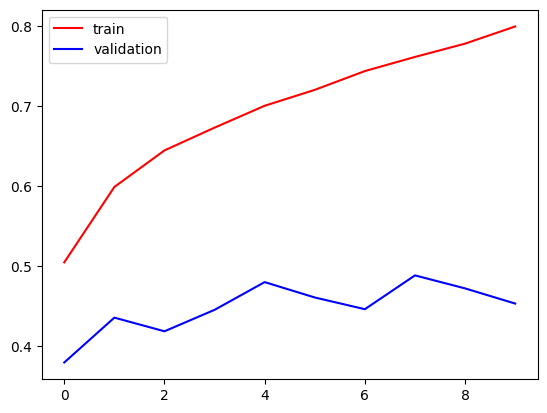

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[1.4074441e-02 1.5432814e-03 2.2758855e-03 2.9572312e-04 1.8917230e-03
  2.0700458e-01 6.2897883e-04 3.4370113e-02 4.1382951e-03 7.3377705e-01]]
Warts and Viral Infections


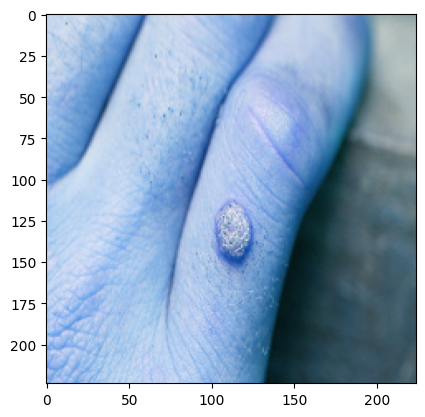

In [ ]:
test_img=cv2.imread('/content/wart.jpg')
plt.imshow(test_img)
test_img=cv2.resize(test_img,(224,224))


test_input=test_img.reshape((1,224,224,3))
plt.imshow(test_img)

y=model2.predict(test_input)
print(y)
answer=dict[np.argmax(y)]
print(answer)

#Model 3

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parameters
data_dir = "/content/IMG_CLASSES_BALANCED"
img_height, img_width = 128, 128  # Smaller resolution to reduce computational complexity
batch_size = 32
num_classes = 10
epochs = 30

# Data Augmentation to reduce overfitting
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Train and Validation Datasets
train_ds = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset="training",
    class_mode="categorical",
    seed=123
)

val_ds = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset="validation",
    class_mode="categorical",
    seed=123
)

# Build a Simple CNN
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

base_model.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(num_classes, activation='softmax')(x)  # Output layer for 10 classes

model3 = Model(inputs=base_model.input, outputs=output)

model3.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model3.summary()

# Model Summary
model3.summary()



Found 14788 images belonging to 10 classes.
Found 3695 images belonging to 10 classes.


Model: "functional_101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11            │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 64, 64, 32)     │            864 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 64, 64, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 64, 64, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 64, 64, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 64, 64, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 64, 64, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 64, 64, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 64, 64, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 64, 64, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 65, 65, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 32, 32, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional_101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11            │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 64, 64, 32)     │            864 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 64, 64, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 64, 64, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 64, 64, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 64, 64, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 64, 64, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 64, 64, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 64, 64, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 64, 64, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 65, 65, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 32, 32, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True,
    verbose=1
)


In [ ]:
# Train the Model
history = model3.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[early_stopping]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


463/463 ━━━━━━━━━━━━━━━━━━━━ 181s 372ms/step - accuracy: 0.3915 - loss: 1.6270 - val_accuracy: 0.3667 - val_loss: 1.6733
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 155s 330ms/step - accuracy: 0.5242 - loss: 1.2057 - val_accuracy: 0.3913 - val_loss: 1.7003
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 204s 332ms/step - accuracy: 0.5474 - loss: 1.1441 - val_accuracy: 0.3848 - val_loss: 1.7667
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


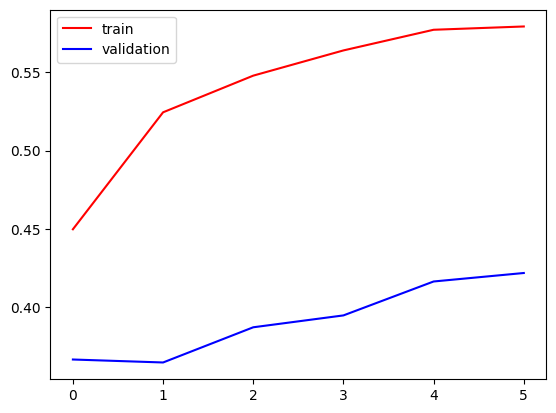

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

# model 1 is best till now

In [ ]:
import tensorflow as tf

data_dir = "/content/IMG_CLASSES_BALANCED"

batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


class_names = train_ds.class_names
print("Classes found:", class_names)


    # Optimize validation data

print("Datasets prepared! Training and validation datasets are ready.")


Found 18483 files belonging to 10 classes.
Using 14787 files for training.
Found 18483 files belonging to 10 classes.
Using 3696 files for validation.
Classes found: ['Atopic Dermatitis', 'Basal Cell Carcinoma', 'Benign Keratosis-like Lesions', 'Eczema', 'Melanocytic Nevi', 'Melanoma', 'Psoriasis and Related Diseases', 'Seborrheic Keratoses and Benign Tumors', 'Tinea and Fungal Infections', 'Warts and Viral Infections']
Datasets prepared! Training and validation datasets are ready.


In [ ]:
model4=Sequential()
model4.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model4.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model4.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model4.add(Flatten())
model4.add(Dense(128,activation='relu'))
model4.add(Dropout(0.1))
model4.add(Dense(64,activation='relu'))
model4.add(Dropout(0.1))
model4.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True,
    verbose=1
)

model4.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history4 = model4.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stopping]
)

NameError: name 'tf' is not defined